In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [57]:
# load preprocess datasets
path = '../../data/processed/'

wine_data = pd.read_csv(
    os.path.join(path, "wine_pro.csv")
)
eto_data = pd.read_csv(
    os.path.join(path, "eto_pro.csv")
)
meteo_data = pd.read_csv(
    os.path.join(path, "meteo_pro.csv")
)

In [58]:
wine_data.columns

Index(['campana', 'id_finca', 'id_zona', 'id_estacion', 'altitud', 'variedad',
       'modo', 'tipo', 'color', 'superficie', 'produccion',
       'sup_tot_camp_finca', 'superficie_total', 'n_var_camp_finca'],
      dtype='object')

In [59]:
eto_data.columns

Index(['year', 'ID_ESTACION', 'GustLocalDayAvgMonth1', 'GustLocalDayAvgMonth2',
       'GustLocalDayAvgMonth3', 'GustLocalDayAvgMonth4',
       'GustLocalDayAvgMonth5', 'GustLocalDayAvgMonth6',
       'MSLPLocalDayAvgMonth1', 'MSLPLocalDayAvgMonth2',
       'MSLPLocalDayAvgMonth3', 'MSLPLocalDayAvgMonth4',
       'MSLPLocalDayAvgMonth5', 'MSLPLocalDayAvgMonth6',
       'RelativeHumidityLocalDayAvgMonth1',
       'RelativeHumidityLocalDayAvgMonth2',
       'RelativeHumidityLocalDayAvgMonth3',
       'RelativeHumidityLocalDayAvgMonth4',
       'RelativeHumidityLocalDayAvgMonth5',
       'RelativeHumidityLocalDayAvgMonth6', 'UVIndexLocalDayAvgMonth1',
       'UVIndexLocalDayAvgMonth2', 'UVIndexLocalDayAvgMonth3',
       'UVIndexLocalDayAvgMonth4', 'UVIndexLocalDayAvgMonth5',
       'UVIndexLocalDayAvgMonth6', 'VisibilityLocalDayAvgMonth1',
       'VisibilityLocalDayAvgMonth2', 'VisibilityLocalDayAvgMonth3',
       'VisibilityLocalDayAvgMonth4', 'VisibilityLocalDayAvgMonth5',
       'Visib

In [60]:
meteo_data.columns

Index(['ID_ESTACION', 'year', 'max_12_to_16_temp_month_1',
       'max_12_to_16_temp_month_2', 'max_12_to_16_temp_month_3',
       'max_12_to_16_temp_month_4', 'max_12_to_16_temp_month_5',
       'max_12_to_16_temp_month_6', 'min_1_to_5_temp_month_1',
       'min_1_to_5_temp_month_2', 'min_1_to_5_temp_month_3',
       'min_1_to_5_temp_month_4', 'min_1_to_5_temp_month_5',
       'min_1_to_5_temp_month_6'],
      dtype='object')

In [62]:
# join datasets
eto_data['year'] = eto_data.year%2000
meteo_data['year'] = meteo_data.year%2000

In [72]:
meteo_data[meteo_data['ID_ESTACION']==4]

,ID_ESTACION,year,max_12_to_16_temp_month_1,max_12_to_16_temp_month_2,max_12_to_16_temp_month_3,max_12_to_16_temp_month_4,max_12_to_16_temp_month_5,max_12_to_16_temp_month_6,min_1_to_5_temp_month_1,min_1_to_5_temp_month_2,min_1_to_5_temp_month_3,min_1_to_5_temp_month_4,min_1_to_5_temp_month_5,min_1_to_5_temp_month_6
32,4,15,18.30,20.182857,23.691429,24.177143,29.494286,35.54,-3.157143,-0.08,1.185714,3.494286,6.58,17.88
33,4,16,18.64,19.480000,23.740000,24.100000,29.580000,35.66,-1.820000,-2.92,0.420000,2.400000,3.78,11.56
34,4,17,16.06,17.760000,27.740000,26.600000,30.100000,36.76,-4.700000,-0.28,1.120000,3.660000,5.60,12.60
35,4,18,19.12,17.120000,23.100000,23.540000,25.340000,32.36,-1.260000,-3.66,-0.380000,4.040000,4.46,10.76
36,4,19,16.50,23.000000,24.220000,24.260000,27.940000,36.60,-4.980000,0.40,0.300000,5.140000,5.90,9.86
37,4,20,15.74,22.020000,27.040000,21.880000,31.320000,33.22,-2.000000,1.84,2.100000,4.680000,9.20,12.02
38,4,21,21.76,19.340000,21.620000,23.880000,30.400000,31.10,-3.860000,3.08,1.800000,4.000000,9.12,13.48
39,4,22,20.28,22.560000,18.380000,24.980000,31.780000,37.58,-3.480000,0.98,2.940000,0.540000,8.00,14.34


In [71]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9601 entries, 0 to 9600
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   campana             9601 non-null   int64  
 1   id_finca            9601 non-null   int64  
 2   id_zona             9601 non-null   int64  
 3   id_estacion         9601 non-null   int64  
 4   altitud             9601 non-null   float64
 5   variedad            9601 non-null   int64  
 6   modo                9601 non-null   int64  
 7   tipo                9601 non-null   int64  
 8   color               9601 non-null   int64  
 9   superficie          9601 non-null   float64
 10  produccion          8526 non-null   float64
 11  sup_tot_camp_finca  9601 non-null   float64
 12  superficie_total    9601 non-null   float64
 13  n_var_camp_finca    9601 non-null   int64  
dtypes: float64(5), int64(9)
memory usage: 1.0 MB


In [78]:
meteo_full = eto_data.merge(
    meteo_data,
    left_on=['ID_ESTACION','year'],
    right_on=['ID_ESTACION','year'],
)

In [113]:
data_full = wine_data.merge(
    meteo_full,
    left_on = ["id_estacion","campana"],
    right_on = ['ID_ESTACION',"year"],
    how='left',
).drop(columns=['ID_ESTACION',"year"])

In [116]:
for col in eto_data.columns[2:].to_list() + meteo_data.columns[2:].to_list():
    data_full[col] = data_full.groupby(['id_estacion'])[col].transform(lambda x: x.fillna(x.mean()))


In [117]:
for col in eto_data.columns[2:].to_list() + meteo_data.columns[2:].to_list():
    data_full[col] = data_full[col].transform(lambda x: x.fillna(x.mean()))


In [118]:
data_test = data_full[data_full['campana']==22]
data = data_full[data_full['campana']<22] 

In [332]:
# data.filter(like='Snow').

In [131]:
# sns.heatmap(
    # data.select_dtypes(exclude=int).corr().abs(),
# )

In [190]:
# Hay que sacar las variables "snow" en los meses de calor.


In [317]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import category_encoders as ce
from xgboost import XGBRegressor
from typing import List, Tuple
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import GroupKFold, KFold
from sklearn.base import clone
from catboost import CatBoostRegressor

seed = 42

def rmse_score(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def eval_model(m, X, y, train_test_idx:List[Tuple[pd.Series,pd.Series]]):
    res = {
        "rmse":[],
        "mape":[],
    }
    for idxs in train_test_idx:
        m_ = clone(m)
        train_idx, test_idx = idxs[0], idxs[1]
        X_train, X_test, y_train, y_test = X[train_idx], X[test_idx], y[train_idx], y[test_idx]
        m_.fit(X_train, y_train)
        y_pred = m_.predict(X_test)
        mape = mean_absolute_percentage_error(y_true=y_test, y_pred=y_pred)
        rmse = rmse_score(y_true=y_test, y_pred=y_pred)
        res['mape'].append(mape)
        res['rmse'].append(rmse)
    return res

In [318]:
# ce.TargetEncoder()
X = data.drop(columns="produccion")
y = data['produccion']
train_idx, test_idx =  X['campana']!=21, X['campana']==21
train_idx2, test_idx2 =  X['campana']!=20, X['campana']==20
train_idx3, test_idx3 =  X['campana']!=19, X['campana']==19
train_test_idx = [(train_idx, test_idx),(train_idx2, test_idx2), (train_idx3, test_idx3)]
print(X.shape, y.shape)

(8526, 97) (8526,)


In [319]:
# baseline
m = make_pipeline(
    StandardScaler(), 
    LinearRegression()
)

eval_model(
    m = m,
    X = X[['superficie']],
    y = y,
    train_test_idx = train_test_idx
)

{'rmse': [9304.045794783258, 9604.170782556743, 7216.989858080228],
 'mape': [14.508420654744564, 7.573869686056217, 4.917818326127008]}

In [326]:
wine_cols = [
    'campana','id_finca','id_zona',
    'id_estacion','superficie','altitud',
    "variedad","modo","tipo",
    "color",'sup_tot_camp_finca',
    'superficie_total','n_var_camp_finca'
]

cat_cols = [
    'id_finca','id_zona',
    'id_estacion','variedad',
    "modo","tipo","color"
]

X[cat_cols] = X[cat_cols].astype("category")


prep = make_column_transformer(
    (ce.OrdinalEncoder(), cat_cols),
    # (ce.TargetEncoder(), cat_cols),
    # (ce.CountEncoder(), cat_cols),
    # (ce.GLMMEncoder(), cat_cols),
    # (ce.QuantileEncoder(), cat_cols),
    # (ce.BaseNEncoder(), cat_cols),
    remainder='passthrough'
)

m = make_pipeline(
    prep, 
    StandardScaler(),
    LinearRegression()
)

eval_model(
    m = m,
    X = X[wine_cols],
    y = y,
    train_test_idx = train_test_idx
)

{'rmse': [9099.673280937339, 9107.699653839534, 6889.486836936577],
 'mape': [8.792865747310467, 2.694048844177762, 2.0849724386181534]}

In [327]:
# more base features
prep = make_column_transformer(
    (ce.OrdinalEncoder(), cat_cols),
    # (ce.TargetEncoder(), cat_cols),
    # (ce.CountEncoder(), cat_cols),
    # (ce.GLMMEncoder(), cat_cols),
    # (ce.QuantileEncoder(), cat_cols),
    # (ce.BaseNEncoder(), cat_cols),
    remainder='passthrough'
)

m = make_pipeline(
    prep, 
    RandomForestRegressor(random_state=seed)
)

eval_model(
    m = m,
    X = X[wine_cols],
    y = y,
    train_test_idx = train_test_idx
)

# {'rmse': [5558.049335489552, 6366.950211490536, 5830.889563548889],
#  'mape': [6.837990608558632, 0.85553702417759, 0.7554832255857427]}

{'rmse': [5634.371714641351, 6429.908316254829, 5700.591498556989],
 'mape': [5.29776973921714, 0.9669608084836333, 0.642672753102016]}

In [331]:
# same features - catboost model

# prep = make_column_transformer(
    # (ce.OrdinalEncoder(), cat_cols),
    # (ce.TargetEncoder(), cat_cols),
    # (ce.CountEncoder(), cat_cols),
    # (ce.GLMMEncoder(), cat_cols),
    # (ce.QuantileEncoder(), cat_cols),
    # (ce.BaseNEncoder(), cat_cols),
    # remainder='passthrough'
# )

# m = make_pipeline(
#     prep, 
#     CatBoostRegressor(random_state=seed)
# )

eval_model(
    m = CatBoostRegressor(random_state=seed, cat_features=cat_cols, verbose=0),
    X = X[wine_cols],
    y = y,
    train_test_idx = train_test_idx
)

{'rmse': [5804.828371423887, 6527.78062513723, 5220.828341127418],
 'mape': [8.420494123028638, 1.5154458577347376, 1.0728977587267101]}

In [333]:
# more base features
eto_cols = X.columns[X.columns.str.contains("Month")].to_list()

prep = make_column_transformer(
    (ce.OrdinalEncoder(), cat_cols),
    # (ce.TargetEncoder(), cat_cols),
    # (ce.CountEncoder(), cat_cols),
    # (ce.GLMMEncoder(), cat_cols),
    # (ce.QuantileEncoder(), cat_cols),
    # (ce.BaseNEncoder(), cat_cols),
    remainder='passthrough'
)

m = make_pipeline(
    prep, 
    RandomForestRegressor(random_state=seed, n_jobs=-1)
)

eval_model(
    m = m,
    X = X[wine_cols+eto_cols],
    y = y,
    train_test_idx = train_test_idx
)

{'rmse': [7453.488871680028, 7788.294754551616, 5519.93004146904],
 'mape': [15.510885915605234, 3.122703665051877, 3.2142197794511658]}

In [334]:
meteo_cols = X.columns[X.columns.str.contains("month")].to_list()

prep = make_column_transformer(
    (ce.OrdinalEncoder(), cat_cols),
    # (ce.TargetEncoder(), cat_cols),
    # (ce.CountEncoder(), cat_cols),
    # (ce.GLMMEncoder(), cat_cols),
    # (ce.QuantileEncoder(), cat_cols),
    # (ce.BaseNEncoder(), cat_cols),
    remainder='passthrough'
)

m = make_pipeline(
    prep, 
    RandomForestRegressor(random_state=seed, n_jobs=-1)
)


eval_model(
    m = m,
    X = X[wine_cols+meteo_cols],
    y = y,
    train_test_idx = train_test_idx
)

{'rmse': [7028.966886276845, 7325.792206720342, 4936.93101361699],
 'mape': [5.841791489127073, 3.826357818335276, 0.8869244937439578]}

<AxesSubplot: >

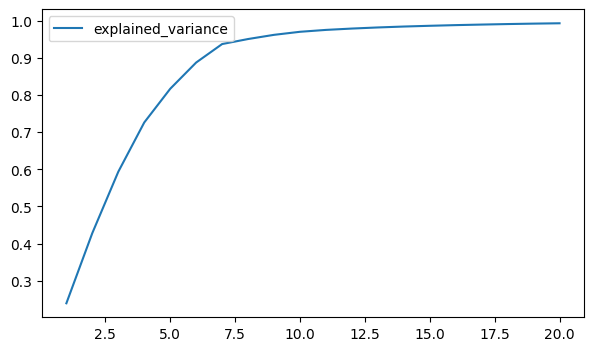

In [313]:
from sklearn.decomposition import PCA

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X[eto_cols+meteo_cols])

n_comps = 20
pca = PCA(n_components=n_comps)
pca.fit(
    X_scaled
)
pd.DataFrame(
    np.cumsum(pca.explained_variance_ratio_),
    index=range(1,n_comps+1),
    columns=['explained_variance']
).plot(figsize=(7,4))

In [335]:
wine_num_cols = [c for c in wine_cols if c not in cat_cols]

prep = make_column_transformer(
    (ce.OrdinalEncoder(), cat_cols),
    # (ce.TargetEncoder(), cat_cols),
    # (ce.CountEncoder(), cat_cols),
    # (ce.GLMMEncoder(), cat_cols),
    # (ce.QuantileEncoder(), cat_cols),
    # (ce.BaseNEncoder(), cat_cols),
    (PCA(n_components=7), meteo_cols+eto_cols),
    remainder='passthrough'
)

m = make_pipeline(
    prep, 
    RandomForestRegressor(random_state=seed, n_jobs=-1)
)

eval_model(
    m = m,
    X = X[wine_cols+meteo_cols+eto_cols],
    y = y,
    train_test_idx = train_test_idx
)

{'rmse': [6743.522879449096, 7353.510196777592, 4694.264480070661],
 'mape': [5.859867782360078, 2.5718660317518536, 0.8447165614538777]}

In [470]:
glm_cols = [
    'id_finca',
    'id_zona',
    'id_estacion'
]

ord_cols = [
    'modo', 
    'tipo', 
    'color'
]

rest_cat_cols = [
    'variedad'
]

prep = make_column_transformer(
    # (ce.CountEncoder(), rest_cat_cols),
    # (ce.BaseNEncoder(), rest_cat_cols),
    # (ce.QuantileEncoder(), rest_cat_cols),
    (ce.TargetEncoder(), rest_cat_cols),
    (ce.OrdinalEncoder(), ord_cols),
    (ce.GLMMEncoder(), glm_cols),
    # (PCA(n_components=3), meteo_cols+eto_cols),
    (StandardScaler(), wine_num_cols),
    # remainder='passthrough'
    remainder='drop'
)


m = make_pipeline(
    prep, 
    CatBoostRegressor(random_state=seed,iterations=500,
                    #   cat_features=rest_cat_cols,
                     verbose=1),
    # XGBRegressor(random_state=seed, n_jobs=-1)
)

final_cols = wine_num_cols+glm_cols+rest_cat_cols+meteo_cols+eto_cols+ord_cols

eval_model(
    m = m,
    X = X[final_cols],
    # X = X[wine_cols],
    y = y,
    train_test_idx = train_test_idx
)

Learning rate set to 0.098858
0:	learn: 12402.9453904	total: 3.76ms	remaining: 1.88s
1:	learn: 11640.1794410	total: 7.01ms	remaining: 1.74s
2:	learn: 10996.1300271	total: 11.2ms	remaining: 1.85s
3:	learn: 10460.0161304	total: 14.5ms	remaining: 1.8s
4:	learn: 9933.2507384	total: 17.1ms	remaining: 1.69s
5:	learn: 9490.4943852	total: 19.4ms	remaining: 1.6s
6:	learn: 9074.6183451	total: 21.8ms	remaining: 1.53s
7:	learn: 8699.1067528	total: 27.9ms	remaining: 1.72s
8:	learn: 8380.8844590	total: 30.5ms	remaining: 1.66s
9:	learn: 8116.8386705	total: 33.5ms	remaining: 1.64s
10:	learn: 7884.3163011	total: 36.4ms	remaining: 1.62s
11:	learn: 7661.1273972	total: 41.3ms	remaining: 1.68s
12:	learn: 7474.5520461	total: 44.8ms	remaining: 1.68s
13:	learn: 7331.1622601	total: 48.2ms	remaining: 1.67s
14:	learn: 7183.2720258	total: 52.3ms	remaining: 1.69s
15:	learn: 7054.0646433	total: 58.1ms	remaining: 1.76s
16:	learn: 6928.2370267	total: 61.5ms	remaining: 1.75s
17:	learn: 6825.8512101	total: 64.2ms	remai

{'rmse': [5676.694798516498, 6372.833269940146, 5752.696777767427],
 'mape': [6.557920884354297, 1.2584488377302265, 1.2474693894938165]}

In [455]:
X_ = prep.fit_transform(X[final_cols], y)
rf = RandomForestRegressor(random_state=seed, n_jobs=-1).fit(X_, y)

In [456]:
fno = []
for t in prep.named_transformers_:
    if t !='remainder':
        fno+=[f"{t}_{c}" for c in prep.named_transformers_[t].get_feature_names_out()]

In [461]:
len(fno + wine_num_cols,), X_.shape

(37, (8526, 37))

In [462]:
pd.DataFrame(
    rf.feature_importances_,
    index=fno + wine_num_cols,
    columns=['feat_imp']
).sort_values('feat_imp', ascending=False)
# .plot(kind='barh', figsize=(5,15))

,feat_imp
superficie,0.602510
glmmencoder_id_zona,0.067653
altitud,0.054365
superficie_total,0.032983
pca_pca0,0.025221
sup_tot_camp_finca,0.025143
pca_pca3,0.020847
pca_pca1,0.018039
pca_pca4,0.015390
glmmencoder_id_estacion,0.014715


In [419]:
# https://www.statsmodels.org/dev/generated/statsmodels.regression.mixed_linear_model.MixedLM.html

glmenc = ce.GLMMEncoder()
finca_trans = glmenc.fit_transform(X[['id_finca']], y)

x = X[['id_finca']] 
x['id_finca_enc']=finca_trans



In [ ]:
glmenc.

In [422]:
pd.concat([x,y],axis=1)

,id_finca,id_finca_enc,produccion
0,76953,6628.287246,22215.0
1,84318,6628.287246,22215.0
2,85579,6077.803028,20978.0
3,69671,14864.189778,40722.0
4,14001,2142.153956,14126.0
...,...,...,...
8521,37461,20101.286633,28160.1
8522,58769,27953.986884,41310.0
8523,58769,27953.986884,45420.0
8524,88928,20780.209822,56140.0


In [407]:
# (m[-1][1].feature_importances_)
# enc = ce.OrdinalEncoder()

# RandomForestRegressor(random_state=seed, n_jobs=-1)
# m.get_feature_names_out(m)
# m[-1][1].get_feature_names_out(m.feature_names_in_)
# m.feature_names_in_
# m.fe
# m[0].


(8526, 48)